# Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing Test and Train data files.
sales_test = pd.read_csv(r"C:\Users\tradi\Downloads\Untitled Folder\Test.csv")
sales_train = pd.read_csv(r"C:\Users\tradi\Downloads\Untitled Folder\Train.csv")
sales_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
sales_train.shape, sales_test.shape

((8523, 12), (5681, 11))

In [4]:
sales_train.isnull().sum() #checking null values 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
sales_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

 **treating null values**

In [6]:
sales_train['Item_Weight'] =  sales_train['Item_Weight'].fillna(sales_train['Item_Weight'].mean()) #imputation
sales_test['Item_Weight'] =  sales_test['Item_Weight'].fillna(sales_test['Item_Weight'].mean())

In [7]:
sales_train['Outlet_Size'] =  sales_train['Outlet_Size'].fillna(sales_train['Outlet_Size'].mode()[0])#imputation
sales_test['Outlet_Size'] =  sales_test['Outlet_Size'].fillna(sales_test['Outlet_Size'].mode()[0])

In [8]:
sales_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [9]:
sales_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [10]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


VISUALIZATION OF NUMERICAL FEATURES

In [11]:
import seaborn as sns
sns.set()

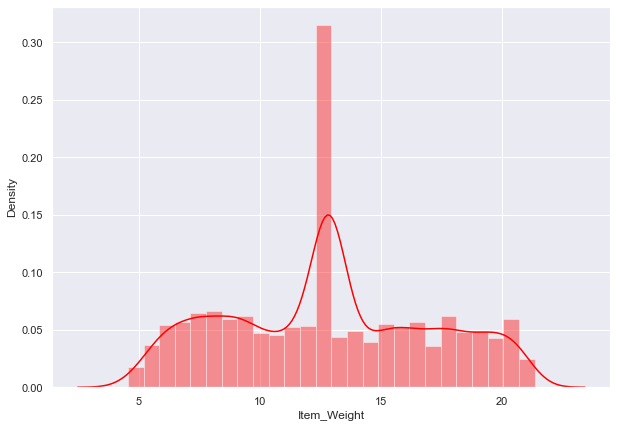

In [12]:
# Item_Weight distribution
plt.figure(figsize=(10,7))
sns.distplot(sales_train['Item_Weight'], color='red')
plt.show()

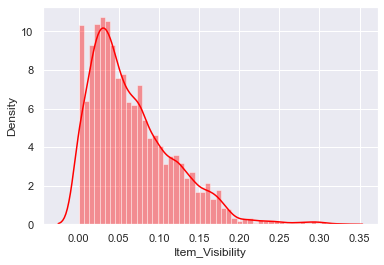

In [13]:
# Item Visibility distribution
#plt.figure(figsize=(5,5))
sns.distplot(sales_train['Item_Visibility'], color='red')
plt.show()

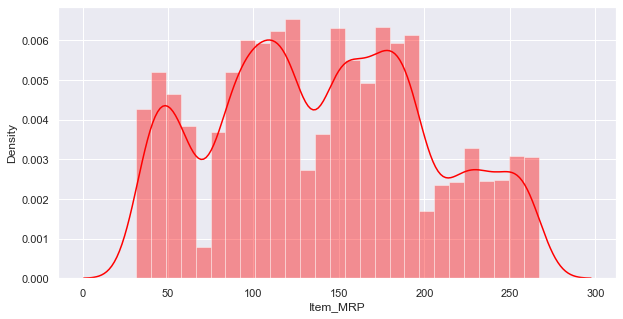

In [14]:
# Item MRP distribution
plt.figure(figsize=(10,5))
sns.distplot(sales_train['Item_MRP'], color='red')
plt.show()

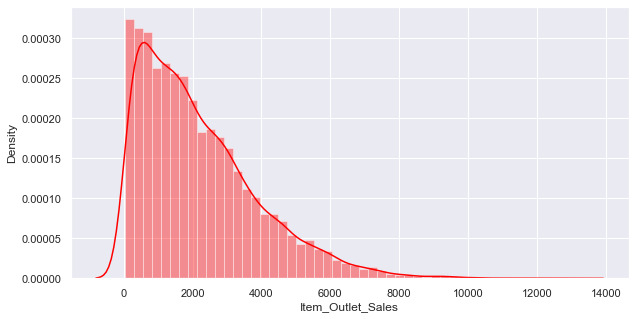

In [15]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(10,5))
sns.distplot(sales_train['Item_Outlet_Sales'], color='red')
plt.show()

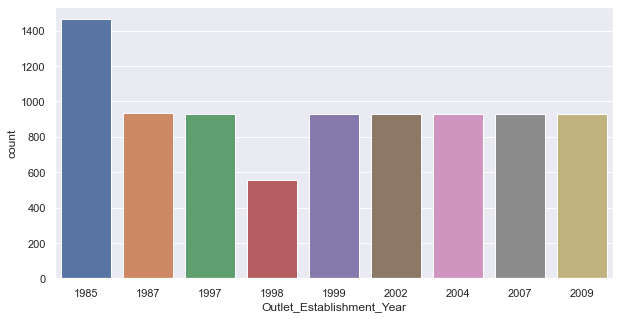

In [16]:
# Outlet_Establishment_Year column
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Establishment_Year', data=sales_train)
plt.show()

VISUALIZATION OF CATEGORICAL FEATURES

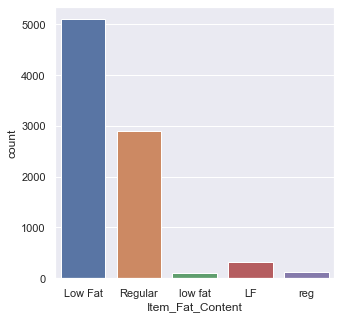

In [17]:
# Item_Fat_Content column
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content', data=sales_train)
plt.show()

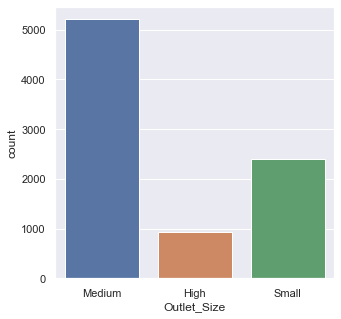

In [18]:
# Outlet_Size column
plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Size', data=sales_train)
plt.show()

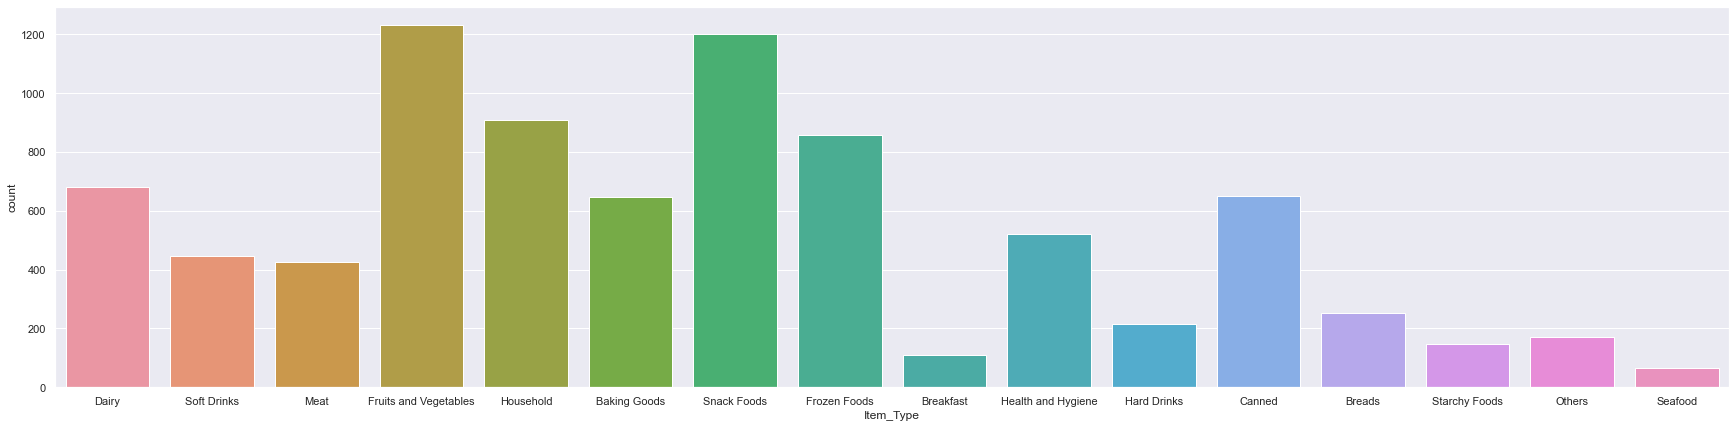

In [19]:
# Item_Type column
plt.figure(figsize=(30,7))
sns.countplot(x='Item_Type', data=sales_train)
plt.show()

Removing irregularities from Item_Fat_Content column

In [20]:
sales_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [21]:
sales_train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
sales_test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

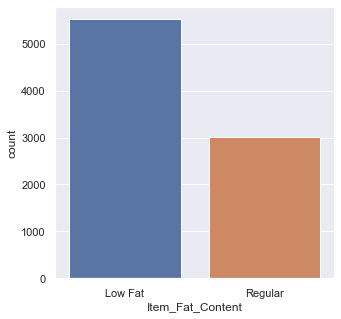

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content', data=sales_train)
plt.show()

In [23]:
sales_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


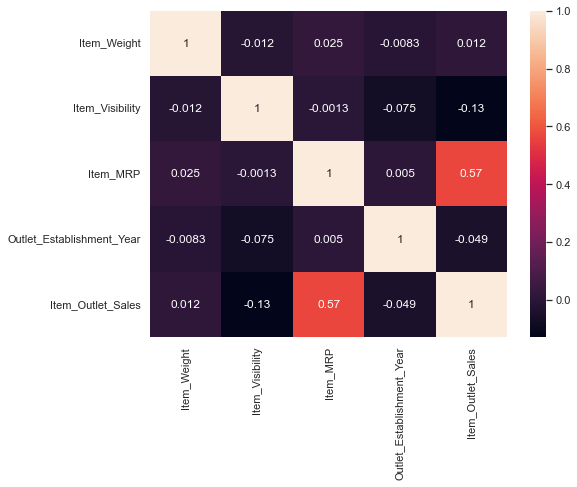

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(sales_train.corr(),annot=True)
plt.show()

In [25]:
sales_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [27]:
sales_train['Item_Identifier'] = encoder.fit_transform(sales_train['Item_Identifier'])

sales_train['Item_Fat_Content'] = encoder.fit_transform(sales_train['Item_Fat_Content'])

sales_train['Item_Type'] = encoder.fit_transform(sales_train['Item_Type'])

sales_train['Outlet_Identifier'] = encoder.fit_transform(sales_train['Outlet_Identifier'])

sales_train['Outlet_Size'] = encoder.fit_transform(sales_train['Outlet_Size'])

sales_train['Outlet_Location_Type'] = encoder.fit_transform(sales_train['Outlet_Location_Type'])

sales_train['Outlet_Type'] = encoder.fit_transform(sales_train['Outlet_Type'])

In [28]:
sales_test['Item_Identifier'].unique()

array(['FDW58', 'FDW14', 'NCN55', ..., 'NCI29', 'FDP28', 'FDF04'],
      dtype=object)

In [29]:
sales_test['Item_Identifier'] = encoder.fit_transform(sales_test['Item_Identifier'])

sales_test['Item_Fat_Content'] = encoder.fit_transform(sales_test['Item_Fat_Content'])

sales_test['Item_Type'] = encoder.fit_transform(sales_test['Item_Type'])

sales_test['Outlet_Identifier'] = encoder.fit_transform(sales_test['Outlet_Identifier'])

sales_test['Outlet_Size'] = encoder.fit_transform(sales_test['Outlet_Size'])

sales_test['Outlet_Location_Type'] = encoder.fit_transform(sales_test['Outlet_Location_Type'])

sales_test['Outlet_Type'] = encoder.fit_transform(sales_test['Outlet_Type'])

In [30]:
sales_train = sales_train.drop(['Item_Identifier','Outlet_Identifier'], axis = 1)
sales_test = sales_test.drop(['Item_Identifier','Outlet_Identifier'], axis = 1)

In [31]:
sales_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


Spliting data by train_test_split

In [32]:
x=sales_train.drop('Item_Outlet_Sales',axis=1)
y=sales_train['Item_Outlet_Sales']

 Scaling Data

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=0)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Model Training and Testing

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


In [36]:
lr=LinearRegression()

knn = KNeighborsRegressor(n_neighbors=10)

dt = DecisionTreeRegressor(max_depth = 3)

rf = RandomForestRegressor(max_depth = 3, n_estimators=500)

ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

Testing with linear regression

In [37]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
r1 = r2_score(y_test,y_pred)
r1

0.5105951012871441

Testing with KNeighborsRegressor

In [45]:
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error
r2 = r2_score(y_test,y_pred)
r2

0.5766839368088715

Testing with DecisionTreeRegressor

In [39]:
dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)
from sklearn.metrics import r2_score
r3 = r2_score(y_test,y_pred)
r3

0.5373350141246751

Testing with RandomForestRegressor

In [40]:
rf = RandomForestRegressor(max_depth = 3, n_estimators=500)
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)
from sklearn.metrics import r2_score
r4 = r2_score(y_test,y_pred)
r4

0.5490589373718968

Testing with AdaBoostRegressor

In [41]:
ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
ada.fit(x_train,y_train)

y_pred = ada.predict(x_test)
from sklearn.metrics import r2_score
r5 = r2_score(y_test,y_pred)
r5

0.5267632717858288

Testing with GradientBoostingRegressor

In [42]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)
gbr.fit(x_train,y_train)

y_pred = gbr.predict(x_test)
from sklearn.metrics import r2_score
r6 = r2_score(y_test,y_pred)
r6

0.5914711773741287

Model Results

In [43]:
metric_results= {'Model': ['linear Regression', 'KNeighbors', 'Decision Tree','RandomForest','AdaBoost','GradientBoosting'], 
                 'R Square': [r1, r2, r3,r4,r5,r6]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,R Square
0,linear Regression,0.510595
1,KNeighbors,0.561299
2,Decision Tree,0.537335
3,RandomForest,0.549059
4,AdaBoost,0.526763
5,GradientBoosting,0.591471


Ploting result

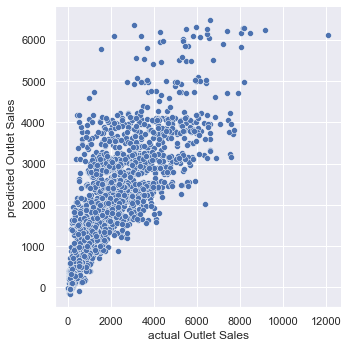

In [44]:
prediction= pd.DataFrame({'actual Outlet Sales': y_test, 'predicted Outlet Sales': y_pred})
sns.relplot(data=prediction, x='actual Outlet Sales', y='predicted Outlet Sales')